In [1]:
# https://www.kaggle.com/kickitlikeshika/employee-access-eda-data-cleaning

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import warnings
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import torch
import torch.nn as nn
# import xgboost as xgb

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use(style='ggplot')
%matplotlib inline

In [19]:
df = pd.read_csv('datasets/amzn_sampleSubmission.csv')
df.head()

Id  Action
0   1       0
1   2       0
2   3       0
3   4       0
4   5       0

In [20]:
train = pd.read_csv('datasets/amzn_train.csv')
train.head()

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0       1     39353   85475         117961         118300         123472   
1       1     17183    1540         117961         118343         123125   
2       1     36724   14457         118219         118220         117884   
3       1     36135    5396         117961         118343         119993   
4       1     42680    5905         117929         117930         119569   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117905            117906       290919     117908  
1      118536            118536       308574     118539  
2      117879            267952        19721     117880  
3      118321            240983       290919     118322  
4      119323            123932        19793     119325

In [21]:
test = pd.read_csv('datasets/amzn_test.csv')
test.head()

id  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0   1     78766   72734         118079         118080         117878   
1   2     40644    4378         117961         118327         118507   
2   3     75443    2395         117961         118300         119488   
3   4     43219   19986         117961         118225         118403   
4   5     42093   50015         117961         118343         119598   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117879            118177        19721     117880  
1      118863            122008       118398     118865  
2      118172            301534       249618     118175  
3      120773            136187       118960     120774  
4      118422            300136       118424     118425

In [22]:
test_id = test['id']


In [23]:
print('train.shape')
train.shape

train.shape


(32769, 10)

In [24]:
print('test.shape')
test.shape

test.shape


(58921, 10)

In [25]:
train.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [27]:
test.isnull().sum()

id                  0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                58921 non-null  int64
 1   RESOURCE          58921 non-null  int64
 2   MGR_ID            58921 non-null  int64
 3   ROLE_ROLLUP_1     58921 non-null  int64
 4   ROLE_ROLLUP_2     58921 non-null  int64
 5   ROLE_DEPTNAME     58921 non-null  int64
 6   ROLE_TITLE        58921 non-null  int64
 7   ROLE_FAMILY_DESC  58921 non-null  int64
 8   ROLE_FAMILY       58921 non-null  int64
 9   ROLE_CODE         58921 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


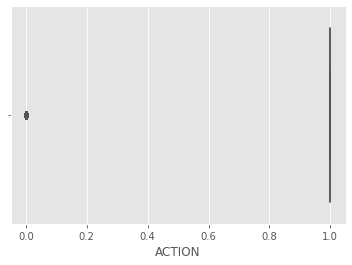

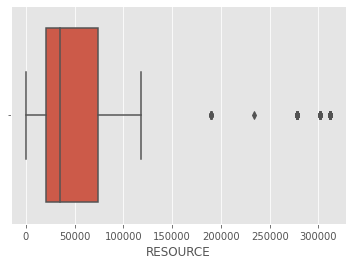

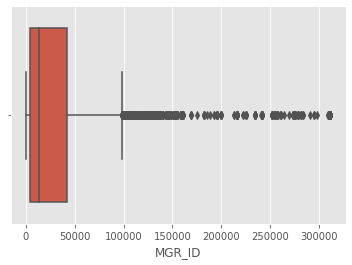

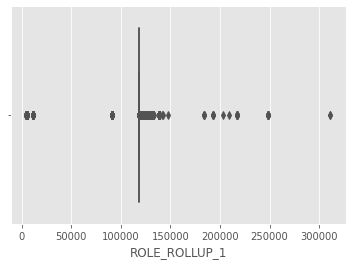

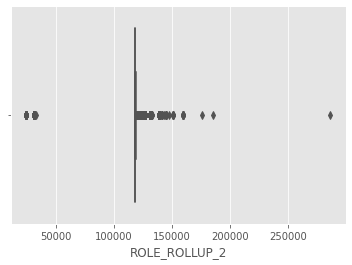

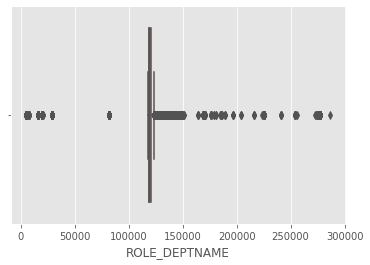

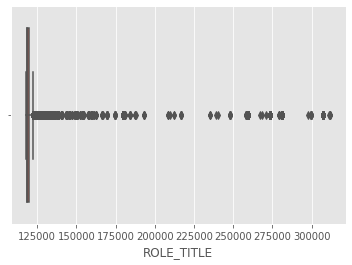

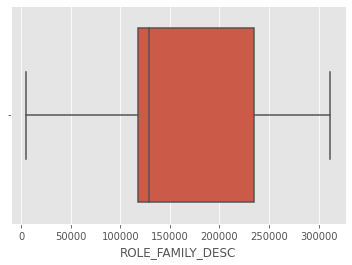

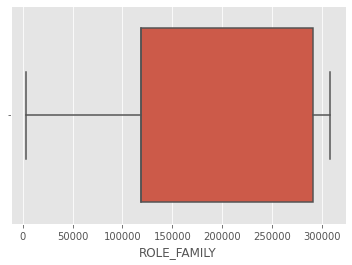

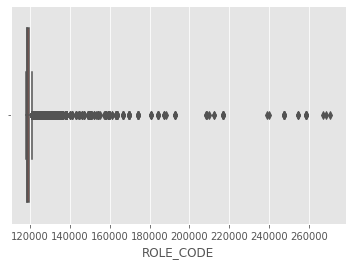

In [30]:
cols = train.columns
for i in cols:
    plt.figure()
    sns.boxplot(train[i])

In [31]:
role_rollup_2_outliers1 = train[train['ROLE_ROLLUP_2'] > 200000]
print("Role Rollup 2 outliers:", len(role_rollup_2_outliers1))


Role Rollup 2 outliers: 1


In [32]:
print(train.shape)
todrop = list(role_rollup_2_outliers1.index)
train.drop(todrop, axis=0, inplace=True)
print(train.shape)

(32769, 10)
(32768, 10)


In [33]:
train.head()

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0       1     39353   85475         117961         118300         123472   
1       1     17183    1540         117961         118343         123125   
2       1     36724   14457         118219         118220         117884   
3       1     36135    5396         117961         118343         119993   
4       1     42680    5905         117929         117930         119569   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117905            117906       290919     117908  
1      118536            118536       308574     118539  
2      117879            267952        19721     117880  
3      118321            240983       290919     118322  
4      119323            123932        19793     119325

In [34]:
train.reset_index(drop=True)

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0           1     39353   85475         117961         118300         123472   
1           1     17183    1540         117961         118343         123125   
2           1     36724   14457         118219         118220         117884   
3           1     36135    5396         117961         118343         119993   
4           1     42680    5905         117929         117930         119569   
...       ...       ...     ...            ...            ...            ...   
32763       1     23497   16971         117961         118300         119993   
32764       1     25139  311198          91261         118026         122392   
32765       1     34924   28805         117961         118327         120299   
32766       1     80574   55643         118256         118257         117945   
32767       1     14354   59575         117916         118150         117920   

       ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0          117905            117906       290919     117908  
1          118536            118536       308574     118539  
2          117879            267952        19721     117880  
3          118321            240983       290919     118322  
4          119323            123932        19793     119325  
...           ...               ...          ...        ...  
32763      118321            240983       290919     118322  
32764      121143            173805       249618     121145  
32765      124922            152038       118612     124924  
32766      280788            280788       292795     119082  
32767      118568            122142        19721     118570  

[32768 rows x 10 columns]

In [36]:
train.describe().T

count           mean            std       min       25%  \
ACTION            32768.0       0.942139       0.233485       0.0       1.0   
RESOURCE          32768.0   42922.758484   34173.771580       0.0   20299.0   
MGR_ID            32768.0   25989.506042   35928.442897      25.0    4566.0   
ROLE_ROLLUP_1     32768.0  116952.597015   10875.728116    4292.0  117961.0   
ROLE_ROLLUP_2     32768.0  118296.681274    4455.467035   23779.0  118102.0   
ROLE_DEPTNAME     32768.0  118907.656647   18938.917512    4674.0  118394.0   
ROLE_TITLE        32768.0  125916.397125   31036.907860  117879.0  118274.0   
ROLE_FAMILY_DESC  32768.0  170179.964874   69509.922935    4673.0  117906.0   
ROLE_FAMILY       32768.0  183700.136932  100488.195184    3130.0  118363.0   
ROLE_CODE         32768.0  119789.487549    5784.354440  117880.0  118232.0   

                       50%       75%       max  
ACTION                 1.0       1.0       1.0  
RESOURCE           35376.0   74187.5  312153.0  
MGR_ID             13545.0   42034.0  311696.0  
ROLE_ROLLUP_1     117961.0  117961.0  311178.0  
ROLE_ROLLUP_2     118300.0  118386.0  185842.0  
ROLE_DEPTNAME     118921.0  120535.0  277693.0  
ROLE_TITLE        118568.0  120006.0  311867.0  
ROLE_FAMILY_DESC  128696.0  235280.0  311867.0  
ROLE_FAMILY       119006.0  290919.0  308574.0  
ROLE_CODE         118570.0  119348.0  270691.0

<AxesSubplot:>

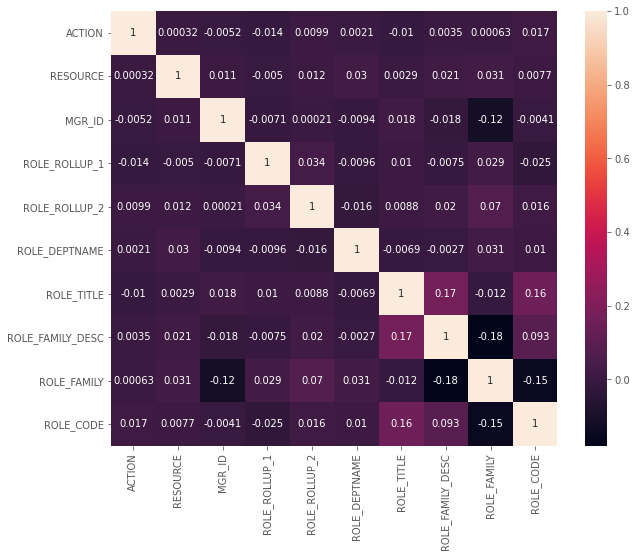

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True)

In [40]:
train['RESOURCE'][:10]

0    39353
1    17183
2    36724
3    36135
4    42680
5    45333
6    25993
7    19666
8    31246
9    78766
Name: RESOURCE, dtype: int64

<Figure size 648x432 with 0 Axes>

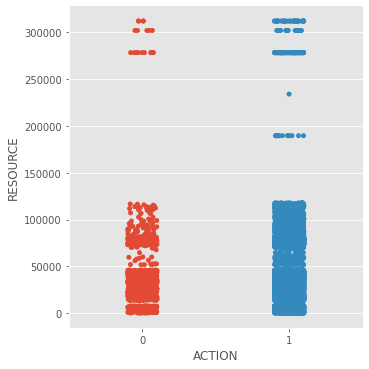

In [41]:
plt.figure(figsize=(9, 6))
sns.catplot('ACTION', 'RESOURCE', data=train)

In [42]:
train['MGR_ID'][:10]

0    85475
1     1540
2    14457
3     5396
4     5905
5    14561
6    17227
7     4209
8      783
9    56683
Name: MGR_ID, dtype: int64

<Figure size 648x432 with 0 Axes>

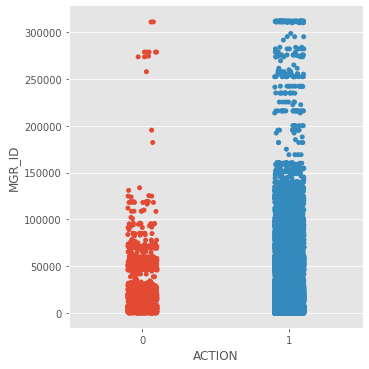

In [43]:
plt.figure(figsize=(9,6))
sns.catplot('ACTION', 'MGR_ID', data=train)

In [45]:
temp = pd.DataFrame(columns=['is_MGR_ID_BiggerThan150000'], dtype=np.float32)
train = pd.concat([train, temp], axis=1)
for i in range(train.shape[0]):
    try:
        if train['MGR_ID'][i] > 150000:
            train['is_MGR_ID_BiggerThan150000'][i] = 1
        else:
            train['is_MGR_ID_BiggerThan150000'][i] = 0
    except Exception:
        train['is_MGR_ID_BiggerThan150000'][i] = 0
        pass

temp = pd.DataFrame(columns=['is_MGR_ID_BiggerThan150000'], dtype=np.float32)
test = pd.concat([test, temp], axis=1)
for i in range(test.shape[0]):
    try:
        if test['MGR_ID'][i] > 150000:
            test['is_MGR_ID_BiggerThan150000'][i] = 1
        else:
            test['is_MGR_ID_BiggerThan150000'][i] = 0
    except Exception:
        test['is_MGR_ID_BiggerThan150000'][i] = 0
        pass

In [46]:
train['ROLE_ROLLUP_1'][:10]


0    117961
1    117961
2    118219
3    117961
4    117929
5    117951
6    117961
7    117961
8    117961
9    118079
Name: ROLE_ROLLUP_1, dtype: int64

<Figure size 864x864 with 0 Axes>

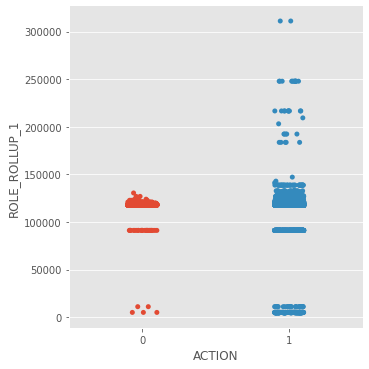

In [47]:
plt.figure(figsize=(12, 12))
sns.catplot('ACTION', 'ROLE_ROLLUP_1', data=train)

In [48]:
temp = pd.DataFrame(columns=['is_ROLE_ROLLUP_1_BiggerThan150000'], dtype=np.float32)
train = pd.concat([train, temp], axis=1)
for i in range(train.shape[0]):
    try:
        if train['ROLE_ROLLUP_1'][i] > 150000:
            train['is_ROLE_ROLLUP_1_BiggerThan150000'][i] = 1
        else:
            train['is_ROLE_ROLLUP_1_BiggerThan150000'][i] = 0
    except Exception:
        train['is_ROLE_ROLLUP_1_BiggerThan150000'][i] = 0
        pass
    
temp = pd.DataFrame(columns=['is_ROLE_ROLLUP_1_BiggerThan150000'], dtype=np.float32)
test = pd.concat([test, temp], axis=1)
for i in range(test.shape[0]):
    try:
        if test['ROLE_ROLLUP_1'][i] > 150000:
            test['is_ROLE_ROLLUP_1_BiggerThan150000'][i] = 1
        else:
            test['is_ROLE_ROLLUP_1_BiggerThan150000'][i] = 0
    except Exception:
        test['is_ROLE_ROLLUP_1_BiggerThan150000'][i] = 0
        pass

In [49]:
train.head()

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0       1     39353   85475         117961         118300         123472   
1       1     17183    1540         117961         118343         123125   
2       1     36724   14457         118219         118220         117884   
3       1     36135    5396         117961         118343         119993   
4       1     42680    5905         117929         117930         119569   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  \
0      117905            117906       290919     117908   
1      118536            118536       308574     118539   
2      117879            267952        19721     117880   
3      118321            240983       290919     118322   
4      119323            123932        19793     119325   

   is_MGR_ID_BiggerThan150000  is_ROLE_ROLLUP_1_BiggerThan150000  
0                         0.0                                0.0  
1                         0.0                                0.0  
2                         0.0                                0.0  
3                         0.0                                0.0  
4                         0.0                                0.0

In [50]:
train['ROLE_ROLLUP_2'][:10]

0    118300
1    118343
2    118220
3    118343
4    117930
5    117952
6    118343
7    117969
8    118413
9    118080
Name: ROLE_ROLLUP_2, dtype: int64

In [51]:
train['ROLE_ROLLUP_2'].value_counts()


118300    4424
118343    3945
118327    2641
118225    2547
118386    1796
          ... 
118907       1
120355       1
141222       1
176316       1
185842       1
Name: ROLE_ROLLUP_2, Length: 176, dtype: int64

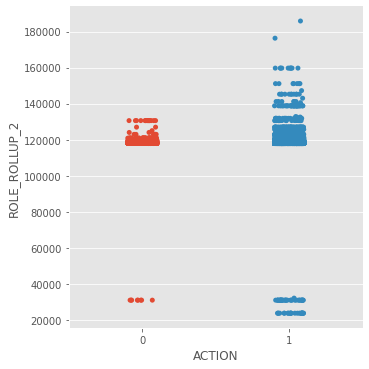

In [52]:
sns.catplot('ACTION', 'ROLE_ROLLUP_2', data=train)

In [53]:
temp = pd.DataFrame(columns=['is_ROLE_ROLLUP_2_BiggerThan140000'], dtype=np.float32)
train = pd.concat([train, temp], axis=1)
for i in range(train.shape[0]):
    try:
        if train['ROLE_ROLLUP_2'][i] > 140000:
            train['is_ROLE_ROLLUP_2_BiggerThan140000'][i] = 1
        else:
            train['is_ROLE_ROLLUP_2_BiggerThan140000'][i] = 0
    except Exception:
        train['is_ROLE_ROLLUP_2_BiggerThan140000'][i] = 0
        pass
    
temp = pd.DataFrame(columns=['is_ROLE_ROLLUP_2_BiggerThan140000'], dtype=np.float32)
test = pd.concat([test, temp], axis=1)
for i in range(test.shape[0]):
    try:
        if test['ROLE_ROLLUP_2'][i] > 140000:
            test['is_ROLE_ROLLUP_2_BiggerThan140000'][i] = 1
        else:
            test['is_ROLE_ROLLUP_2_BiggerThan140000'][i] = 0
    except Exception:
        test['is_ROLE_ROLLUP_2_BiggerThan140000'][i] = 0
        pass

In [54]:
train['ROLE_DEPTNAME'][:10]

0    123472
1    123125
2    117884
3    119993
4    119569
5    118008
6    123476
7    118910
8    120584
9    117878
Name: ROLE_DEPTNAME, dtype: int64

In [56]:
train['ROLE_DEPTNAME'].value_counts()

117878    1135
117941     763
117945     659
118514     601
117920     597
          ... 
121097       1
132647       1
118035       1
134848       1
119565       1
Name: ROLE_DEPTNAME, Length: 448, dtype: int64

<Figure size 648x432 with 0 Axes>

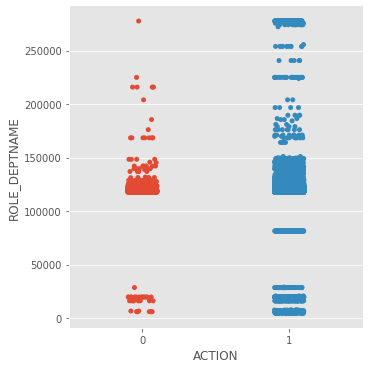

In [57]:
plt.figure(figsize=(9, 6))
sns.catplot('ACTION', 'ROLE_DEPTNAME', data=train)

In [58]:
len(train[train['ROLE_DEPTNAME'] < 100000])

729

In [59]:
train['ROLE_TITLE'][:10]


0    117905
1    118536
2    117879
3    118321
4    119323
5    118568
6    118980
7    126820
8    128230
9    117879
Name: ROLE_TITLE, dtype: int64

In [60]:
train['ROLE_TITLE'].value_counts()


118321    4649
117905    3582
118784    1772
117879    1256
118568    1043
          ... 
310825       1
126547       1
152268       1
270690       1
137370       1
Name: ROLE_TITLE, Length: 343, dtype: int64

<Figure size 648x432 with 0 Axes>

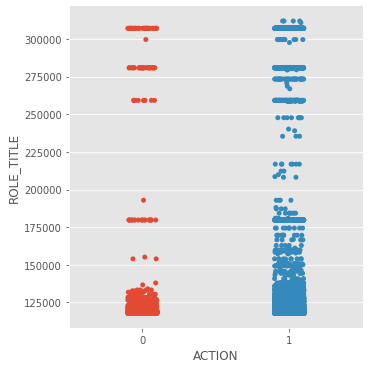

In [61]:
plt.figure(figsize=(9, 6))
sns.catplot('ACTION', 'ROLE_TITLE', data=train)

In [62]:
train['ROLE_FAMILY_DESC'][:10]


0    117906
1    118536
2    267952
3    240983
4    123932
5    118568
6    301534
7    269034
8    302830
9    304519
Name: ROLE_FAMILY_DESC, dtype: int64

In [63]:
train['ROLE_FAMILY_DESC'].value_counts()


117906    6895
240983    1244
117913     670
279443     665
117886     530
          ... 
130906       1
247469       1
245410       1
128635       1
247799       1
Name: ROLE_FAMILY_DESC, Length: 2358, dtype: int64

<Figure size 648x504 with 0 Axes>

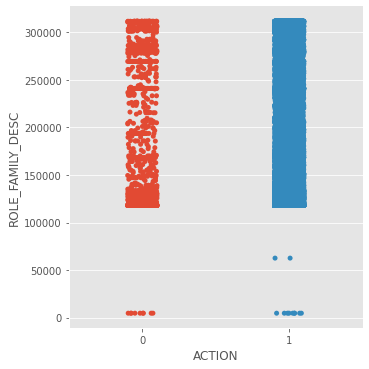

In [64]:
plt.figure(figsize=(9, 7))
sns.catplot('ACTION', 'ROLE_FAMILY_DESC', data=train)

In [65]:
train['ROLE_FAMILY'][:10]


0    290919
1    308574
2     19721
3    290919
4     19793
5     19721
6    118295
7    118638
8      4673
9     19721
Name: ROLE_FAMILY, dtype: int64

In [66]:
train['ROLE_FAMILY'].value_counts()


290919    10979
118424     2690
19721      2636
117887     2400
292795     1318
          ...  
130364        3
159679        3
132725        2
161100        2
149353        2
Name: ROLE_FAMILY, Length: 67, dtype: int64

<Figure size 648x432 with 0 Axes>

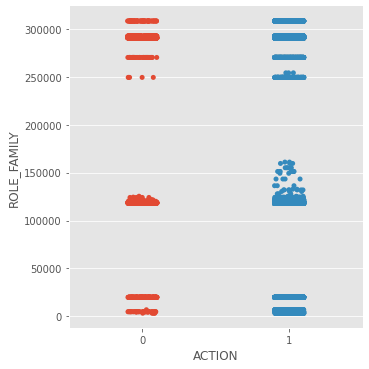

In [67]:
plt.figure(figsize=(9, 6))
sns.catplot('ACTION', 'ROLE_FAMILY', data=train)

In [68]:
train['ROLE_CODE'][:10]


0    117908
1    118539
2    117880
3    118322
4    119325
5    118570
6    118982
7    126822
8    128231
9    117880
Name: ROLE_CODE, dtype: int64

In [69]:
train['ROLE_CODE'].value_counts()


118322    4649
117908    3582
118786    1772
117880    1256
118570    1043
          ... 
157348       1
126549       1
239004       1
209875       1
152270       1
Name: ROLE_CODE, Length: 343, dtype: int64

<Figure size 648x432 with 0 Axes>

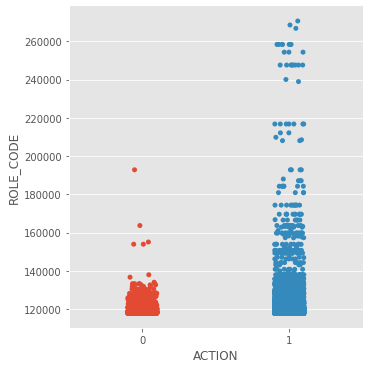

In [70]:
plt.figure(figsize=(9, 6))
sns.catplot('ACTION', 'ROLE_CODE', data=train)

In [71]:
temp = pd.DataFrame(columns=['is_ROLE_CODE_BiggerThan200000'], dtype=np.float32)
train = pd.concat([train, temp], axis=1)
for i in range(train.shape[0]):
    try:
        if train['ROLE_CODE'][i] > 140000:
            train['is_ROLE_CODE_BiggerThan200000'][i] = 1
        else:
            train['is_ROLE_CODE_BiggerThan200000'][i] = 0
    except Exception:
        train['is_ROLE_CODE_BiggerThan200000'][i] = 0
        pass
    
temp = pd.DataFrame(columns=['is_ROLE_CODE_BiggerThan200000'], dtype=np.float32)
test = pd.concat([test, temp], axis=1)
for i in range(test.shape[0]):
    try:
        if test['ROLE_CODE'][i] > 140000:
            test['is_ROLE_CODE_BiggerThan200000'][i] = 1
        else:
            test['is_ROLE_CODE_BiggerThan200000'][i] = 0
    except Exception:
        test['is_ROLE_CODE_BiggerThan200000'][i] = 0
        pass

In [72]:
train['is_ROLE_CODE_BiggerThan200000'].value_counts()


0.0    32534
1.0      233
Name: is_ROLE_CODE_BiggerThan200000, dtype: int64

In [73]:
train.isnull().sum()


ACTION                               0
RESOURCE                             0
MGR_ID                               0
ROLE_ROLLUP_1                        0
ROLE_ROLLUP_2                        0
ROLE_DEPTNAME                        0
ROLE_TITLE                           0
ROLE_FAMILY_DESC                     0
ROLE_FAMILY                          0
ROLE_CODE                            0
is_MGR_ID_BiggerThan150000           1
is_ROLE_ROLLUP_1_BiggerThan150000    1
is_ROLE_ROLLUP_2_BiggerThan140000    1
is_ROLE_CODE_BiggerThan200000        1
dtype: int64

In [74]:
train[train['is_MGR_ID_BiggerThan150000'].isnull()]


ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
32768       1     14354   59575         117916         118150         117920   

       ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  \
32768      118568            122142        19721     118570   

       is_MGR_ID_BiggerThan150000  is_ROLE_ROLLUP_1_BiggerThan150000  \
32768                         NaN                                NaN   

       is_ROLE_ROLLUP_2_BiggerThan140000  is_ROLE_CODE_BiggerThan200000  
32768                                NaN                            NaN

In [75]:
train.drop(32768, axis=0, inplace=True)
